In [35]:
import xlwings as xw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import seaborn as sns

# Machine learning 
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA


pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',100)
#pd.set_option('display.max_rows',None)

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
raw_xl = xw.Book( 'TestLibrary_시험용(헤더 수정).xlsx')

# pd_sheet = pd.read_excel( '2.xlsx', sheet_name=None)

# 주파수 중심 주파수, 대역폭 열 추가

In [4]:
sh = raw_xl.sheets(1)

# 위협 라이브로리 로딩
n_df_1 = sh.range('A1').options(pd.DataFrame, expand='table').value
n_df_1.insert( 4, 'Delta Freq(MHz)', n_df_1['FreqHigh(MHz)'] - n_df_1['FreqLow(MHz)'] )
n_df_1.insert( 4, 'CenterFreq(MHz)', ( n_df_1['FreqHigh(MHz)'] + n_df_1['FreqLow(MHz)'] ) / 2.0 )

n_df_1.insert( 13, 'Delta PRI(usec)', n_df_1['PRIHigh(usec)'] - n_df_1['PRILow(usec)'] )
n_df_1.insert( 13, 'CenterPRI(usec)', ( n_df_1['PRIHigh(usec)'] + n_df_1['PRILow(usec)'] ) / 2.0 )

n_df_1.insert( 24, 'Delta PW(usec)', n_df_1['PW High(usec)'] - n_df_1['PW Low(usec)'] )
n_df_1.insert( 24, 'CenterPW(usec)', ( n_df_1['PW High(usec)'] + n_df_1['PW Low(usec)'] ) / 2.0 )

n_df_jamming = []
for iter in range(2,7+1):
    sh = raw_xl.sheets(iter)
    n_df_jamming.append( sh.range('A1').options(pd.DataFrame, expand='table').value )


# 재밍 라이브로리 로딩
jamming_index_range = []
for iter in range(6):
    range_index = [ n_df_jamming[iter].index.min(), n_df_jamming[iter].index.max() ]
    jamming_index_range.append( range_index )
print( jamming_index_range )

def MakeJammingTech( strFilter ):
    list_tech = []
    
    #n_df_1[ strFilter ]
    
    for iter in n_df_1[ strFilter ]:
        #print( iter )
        index = -1
        if iter != 0:
            index = 0
            for iter2 in jamming_index_range:
                if iter2[0] <= iter and iter2[1] >= iter:
                    break;
                index = index + 1
        list_tech.append( index )
    
    #print( list_tech )
    return list_tech


list_tech = MakeJammingTech( 'First Tech No' )
n_df_1.insert( 20, 'Jamming Tech1', list_tech )

list_tech = MakeJammingTech( 'Second Tech No' )
n_df_1.insert( 20, 'Jamming Tech2', list_tech )

[[1.0, 300.0], [301.0, 600.0], [701.0, 900.0], [901.0, 1290.0], [1401.0, 1600.0], [1701.0, 2000.0]]


In [4]:
n_df_1.describe()

,Pulse Type,RF Type,FreqLow(MHz),FreqHigh(MHz),CenterFreq(MHz),Delta Freq(MHz),SwitchLevel,PatternType,PatternPeriodLow(usec),PatternPeriodHigh(usec),PRI Type,PRILow(usec),PRIHigh(usec),CenterPRI(usec),Delta PRI(usec),PRF Low(usec),PRF High(usec),Jitter(%),Stagger/Switch Level,PRI Pattern Type,Jamming Tech2,Jamming Tech1,PRI PatternPeriodLow(usec),PRI PatternPeriodHigh(usec),PW Low(usec),PW High(usec),CenterPW(usec),Delta PW(usec),AS Type,AS Low(usec),AS High(usec),Threat\nLevel,DeleteTime(sec),Category,First Tech No,Second Tech No,Jamming Threshold,Dwell Freq1 Low(MHz),Dwell Freq1 High(MHz),Dwell Freq2 Low(MHz),Dwell Freq2 High(MHz),Dwell Freq3 Low(MHz),Dwell Freq3 High(MHz),Dwell Freq4 Low(MHz),Dwell Freq4 High(MHz),Dwell Freq5 Low(MHz),Dwell Freq5 High(MHz),Dwell Freq6 Low(MHz),Dwell Freq6 High(MHz),Dwell Freq7 Low(MHz),Dwell Freq7 High(MHz),Dwell Freq8 Low(MHz),Dwell Freq8 High(MHz),Dwell Freq9 Low(MHz),Dwell Freq9 High(MHz),Dwell Freq10 Low(MHz),Dwell Freq10 High(MHz),Dwell Freq11 Low(MHz),Dwell Freq11 High(MHz),Dwell Freq12 Low(MHz),Dwell Freq12 High(MHz),Dwell Freq13 Low(MHz),Dwell Freq13 High(MHz),Dwell Freq14 Low(MHz),Dwell Freq14 High(MHz),Dwell Freq15 Low(MHz),Dwell Freq15 High(MHz),Dwell Freq16 Low(MHz),Dwell Freq16 High(MHz),SD Value1 Low(MHz),SD Value1 High(MHz),SD Value2 Low(MHz),SD Value2 High(MHz),SD Value3 Low(MHz),SD Value3 High(MHz),SD Value4 Low(MHz),SD Value4 High(MHz),SD Value5 Low(MHz),SD Value5 High(MHz),SD Value6 Low(MHz),SD Value6 High(MHz),SD Value7 Low(MHz),SD Value7 High(MHz),SD Value8 Low(MHz),SD Value8 High(MHz),SD Value9 Low(MHz),SD Value9 High(MHz),SD Value10 Low(MHz),SD Value10 High(MHz),SD Value11 Low(MHz),SD Value11 High(MHz),SD Value12 Low(MHz),SD Value12 High(MHz),SD Value13 Low(MHz),SD Value13 High(MHz),SD Value14 Low(MHz),SD Value14 High(MHz),SD Value15 Low(MHz),SD Value15 High(MHz),SD Value16 Low(MHz),SD Value16 High(MHz),Auto\nWarning,ERP(W),Platform 1 No,Platform 2 No,Platform 3 No,Platform 4 No,Platform 5 No
count,2000.0,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.0,2000.0,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.0,2000.000000,2000.000000,2000.0,2000.0,2000.000000,2000.0000,2000.000000,2000.00000,2000.000000,2.000000e+03,2.000000e+03,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.00000,2000.000000,2000.00000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,1.0,1.20400,7915.781100,8236.329000,8076.055050,320.547900,0.0,0.0,0.0,0.0,1.899500,1028.891250,1272.837850,1150.864550,243.946600,2592.063450,3619.657150,3.33700,0.384000,0.0,-0.849000,-0.694000,0.0,0.0,3.042700,9.7703,6.406500,6.72760,1.800500,2.861765e+06,5.655994e+06,6.018500,0.0,2.112000,82.019500,43.540000,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.87475,52.850000,41.01390,55.99065,32.06565,47.036250,28.028100,42.402650,14.151750,20.409650,12.405350,18.656550,7.909450,13.615050,7.917450,13.623050,7.149450,12.85505,7.149450,12.85505,7.149450,12.85505,7.149450,12.85505,7.149450,12.85505,7.149450,12.85505,7.149450,12.85505,7.149450,12.85505,0.280500,1.0,1.0,2.0,3.0,4.0,5.0
std,0.0,0.40307,3338.585028,3417.908059,3372.777501,392.401176,0.0,0.0,0.0,0.0,1.019765,1009.110911,1351.641749,1099.525829,924.474067,6516.574832,8628.319215,5.15031,1.951781,0.0,0.8

In [5]:
print( "ELNOT 개수 : " , n_df_1['EmitterNotation'].nunique() )

ELNOT 개수 :  279


# ENLOT의 알파벳 시작으로 히스토그램 그리기

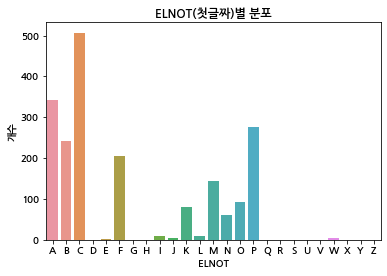

In [5]:
match_ELNOT = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "U", "V", "W", "X", "Y", "Z"]
m_elnot_count = []
for x in match_ELNOT :
    m_elnot_count.append( n_df_1['EmitterNotation'].str.startswith( x ).sum() )
    
data = { 'ELNOT' : match_ELNOT, '개수' : m_elnot_count }
n_df = pd.DataFrame( data )

plt.figure()
plt.title( 'ELNOT(첫글짜)별 분포')
sns.barplot( data=n_df, x='ELNOT', y='개수' )
plt.show()

In [7]:
n_df

,ELNOT,개수
0,A,343
1,B,243
2,C,507
3,D,0
4,E,1
5,F,206
6,G,0
7,H,0
8,I,10
9,J,5


In [8]:
n_df.sort_values(by='개수', ascending=False)


,ELNOT,개수
2,C,507
0,A,343
15,P,275
1,B,243
5,F,206
12,M,145
14,O,92
10,K,81
13,N,61
8,I,10


# 대역폭이 넓은 순으로 위협 라이브러리 정렬하기

In [6]:
#n_df_1.sort_values('Delta Freq(MHz)')
n_df_1.sort_values(by=['Delta Freq(MHz)'], ascending=True)


,Pulse Type,RF Type,FreqLow(MHz),FreqHigh(MHz),CenterFreq(MHz),Delta Freq(MHz),SwitchLevel,PatternType,PatternPeriodLow(usec),PatternPeriodHigh(usec),PRI Type,PRILow(usec),PRIHigh(usec),CenterPRI(usec),Delta PRI(usec),PRF Low(usec),PRF High(usec),Jitter(%),Stagger/Switch Level,PRI Pattern Type,Jamming Tech2,Jamming Tech1,PRI PatternPeriodLow(usec),PRI PatternPeriodHigh(usec),PW Low(usec),PW High(usec),CenterPW(usec),Delta PW(usec),AS Type,AS Low(usec),AS High(usec),Threat\nLevel,DeleteTime(sec),EmitterNotation,RadarMode Name,Category,First Tech No,Second Tech No,Jamming Threshold,Dwell Freq1 Low(MHz),Dwell Freq1 High(MHz),Dwell Freq2 Low(MHz),Dwell Freq2 High(MHz),Dwell Freq3 Low(MHz),Dwell Freq3 High(MHz),Dwell Freq4 Low(MHz),Dwell Freq4 High(MHz),Dwell Freq5 Low(MHz),Dwell Freq5 High(MHz),Dwell Freq6 Low(MHz),Dwell Freq6 High(MHz),Dwell Freq7 Low(MHz),Dwell Freq7 High(MHz),Dwell Freq8 Low(MHz),Dwell Freq8 High(MHz),Dwell Freq9 Low(MHz),Dwell Freq9 High(MHz),Dwell Freq10 Low(MHz),Dwell Freq10 High(MHz),Dwell Freq11 Low(MHz),Dwell Freq11 High(MHz),Dwell Freq12 Low(MHz),Dwell Freq12 High(MHz),Dwell Freq13 Low(MHz),Dwell Freq13 High(MHz),Dwell Freq14 Low(MHz),Dwell Freq14 High(MHz),Dwell Freq15 Low(MHz),Dwell Freq15 High(MHz),Dwell Freq16 Low(MHz),Dwell Freq16 High(MHz),SD Value1 Low(MHz),SD Value1 High(MHz),SD Value2 Low(MHz),SD Value2 High(MHz),SD Value3 Low(MHz),SD Value3 High(MHz),SD Value4 Low(MHz),SD Value4 High(MHz),SD Value5 Low(MHz),SD Value5 High(MHz),SD Value6 Low(MHz),SD Value6 High(MHz),SD Value7 Low(MHz),SD Value7 High(MHz),SD Value8 Low(MHz),SD Value8 High(MHz),SD Value9 Low(MHz),SD Value9 High(MHz),SD Value10 Low(MHz),SD Value10 High(MHz),SD Value11 Low(MHz),SD Value11 High(MHz),SD Value12 Low(MHz),SD Value12 High(MHz),SD Value13 Low(MHz),SD Value13 High(MHz),SD Value14 Low(MHz),SD Value14 High(MHz),SD Value15 Low(MHz),SD Value15 High(MHz),SD Value16 Low(MHz),SD Value16 High(MHz),Auto\nWarning,ERP(W),Platform 1 No,Platform 1 Name,Platform 2 No,Platform 2 Name,Platform 3 No,Platform 3 Name,Platform 4 No,Platform 4 Name,Platform 5 No,Platform 5 Name
No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1135.0,1.0,1.0,9052.0,9052.0,9052.0,0.0,0.0,0.0,0.0,0.0,1.0,249.0,251.0,250.00,2.0,3984.1,4016.1,0.0,0.0,0.0,-1,-1,0.0,0.0,0.4,0.6,0.50,0.2,1.0,12000000.0,12200000.0,7.0,0.0,F341A,BACK BOARD 1,2.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,C DDG,2.0,FFG,3.0,-,4.0,-,5.0,-
1085.0,1.0,1.0,9565.0,9565.0,9565.0,0.0,0.0,0.0,0.0,0.0,1.0,198.0,200.0,199.00,2.0,5000.0,5050.5,0.0,0.0,0.0,-1,-1,0.0,0.0,5.7,5.9,5.80,0.2,1.0,1010000.0,1020000.0,7.0,0.0,C412A,SR47B-G,2.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,C CV/DDG,2.0,FFG/LPD,3.0,-,4.0,-,5.0,-
1084.0,1.0,1.0,9565.0,9565.0,9565.0,0.0,0.0,0.0,0.0,0.0,1.0,397.0,399.0,398.00,2.0,2506.3,2518.9,0.0,0.0,0.0,-1,-1,0.0,0.0,12.2,12.4,12.30,0.2,1.0,1010000.0,1020000.0,7.0,0.0,C412A,SR47B-G,2.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,C CV/DDG,2.0,FFG/LPD,3.0,-,4.0,-,5.0,-
1895.0,1.0,1.0,8990.0,8990.0,8990.0,0.0,0.0,0.0,0.0,0.0,3.0,32.0,68.0,50.00,36.0,14705.9,31250.0,10.0,0.0,0.0,-1,-1,0.0,0.0,3.9,4.1,4.00,0.2,3.0,10000.0,3000000.0,1.0,0.0,M600Z,EL/M-2032,1.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

# PRI 큰 순으로 위협 라이브러리 정렬하기

In [9]:
#n_df_1.sort_values('CenterPRI(usec)')
n_df_1.sort_values(by=['CenterPRI(usec)'], ascending=False)

,Pulse Type,RF Type,FreqLow(MHz),FreqHigh(MHz),CenterFreq(MHz),Delta Freq(MHz),SwitchLevel,PatternType,PatternPeriodLow(usec),PatternPeriodHigh(usec),PRI Type,PRILow(usec),PRIHigh(usec),CenterPRI(usec),Delta PRI(usec),PRF Low(usec),PRF High(usec),Jitter(%),Stagger/Switch Level,PRI Pattern Type,Jamming Tech2,Jamming Tech1,PRI PatternPeriodLow(usec),PRI PatternPeriodHigh(usec),PW Low(usec),PW High(usec),CenterPW(usec),Delta PW(usec),AS Type,AS Low(usec),AS High(usec),Threat\nLevel,DeleteTime(sec),EmitterNotation,RadarMode Name,Category,First Tech No,Second Tech No,Jamming Threshold,Dwell Freq1 Low(MHz),Dwell Freq1 High(MHz),Dwell Freq2 Low(MHz),Dwell Freq2 High(MHz),Dwell Freq3 Low(MHz),Dwell Freq3 High(MHz),Dwell Freq4 Low(MHz),Dwell Freq4 High(MHz),Dwell Freq5 Low(MHz),Dwell Freq5 High(MHz),Dwell Freq6 Low(MHz),Dwell Freq6 High(MHz),Dwell Freq7 Low(MHz),Dwell Freq7 High(MHz),Dwell Freq8 Low(MHz),Dwell Freq8 High(MHz),Dwell Freq9 Low(MHz),Dwell Freq9 High(MHz),Dwell Freq10 Low(MHz),Dwell Freq10 High(MHz),Dwell Freq11 Low(MHz),Dwell Freq11 High(MHz),Dwell Freq12 Low(MHz),Dwell Freq12 High(MHz),Dwell Freq13 Low(MHz),Dwell Freq13 High(MHz),Dwell Freq14 Low(MHz),Dwell Freq14 High(MHz),Dwell Freq15 Low(MHz),Dwell Freq15 High(MHz),Dwell Freq16 Low(MHz),Dwell Freq16 High(MHz),SD Value1 Low(MHz),SD Value1 High(MHz),SD Value2 Low(MHz),SD Value2 High(MHz),SD Value3 Low(MHz),SD Value3 High(MHz),SD Value4 Low(MHz),SD Value4 High(MHz),SD Value5 Low(MHz),SD Value5 High(MHz),SD Value6 Low(MHz),SD Value6 High(MHz),SD Value7 Low(MHz),SD Value7 High(MHz),SD Value8 Low(MHz),SD Value8 High(MHz),SD Value9 Low(MHz),SD Value9 High(MHz),SD Value10 Low(MHz),SD Value10 High(MHz),SD Value11 Low(MHz),SD Value11 High(MHz),SD Value12 Low(MHz),SD Value12 High(MHz),SD Value13 Low(MHz),SD Value13 High(MHz),SD Value14 Low(MHz),SD Value14 High(MHz),SD Value15 Low(MHz),SD Value15 High(MHz),SD Value16 Low(MHz),SD Value16 High(MHz),Auto\nWarning,ERP(W),Platform 1 No,Platform 1 Name,Platform 2 No,Platform 2 Name,Platform 3 No,Platform 3 Name,Platform 4 No,Platform 4 Name,Platform 5 No,Platform 5 Name
No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
485.0,1.0,1.0,10050.0,10278.0,10164.0,228.0,0.0,0.0,0.0,0.0,1.0,10000.0,10000.0,10000.0,0.0,100.0,100.0,0.0,0.0,0.0,-1,-1,0.0,0.0,0.6,6.0,3.30,5.4,0.0,70000.0,850000.0,8.0,0.0,F324A,TOP DOME,2.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,RU CGN,2.0,CG,3.0,GARGOYLE,4.0,-,5.0,-
1772.0,1.0,1.0,8878.0,9812.0,9345.0,934.0,0.0,0.0,0.0,0.0,1.0,8968.6,9852.2,9410.4,883.6,101.5,111.5,0.0,0.0,0.0,-1,-1,0.0,0.0,3.8,4.2,4.00,0.4,3.0,6800000.0,8400000.0,1.0,0.0,I344Z,RDR-2000,1.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,US RC-12,2.0,NW,3.0,-,4.0,-,5.0,-
718.0,1.0,1.0,3301.0,3397.0,3349.0,96.0,0.0,0.0,0.0,0.0,1.0,6494.0,6623.0,6558.5,129.0,151.0,154.0,0.0,0.0,0.0,-1,-1,0.0,0.0,3.2,4.0,3.60,0.8,1.0,9500000.0,9900000.0,7.0,0.0,A414Z,SQUASH DOME,1.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,RU IL-76,2.0,A-50,3.0,-,4.0,-,5.0,-
1896.0,1.0,1.0,3300.0,3600.0,3450.0,300.0,0.0,0.0,0.0,0.0,3.0,6024.0,6135.0,6079.5,111.0,163.0,166.0,5.0,0.0,0.0,-1,-1,0.0,0.0,0.2,1.1,0.65,0.9,1.0,1400000.0,1600000.0,1.0,0.0,M620Z,AN/APN-169,1.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# PW 큰 순으로 위협 라이브러리 정렬하기

In [10]:
#n_df_1.sort_values('CenterPW(usec)')
n_df_1.sort_values(by=['CenterPW(usec)'], ascending=True)

,Pulse Type,RF Type,FreqLow(MHz),FreqHigh(MHz),CenterFreq(MHz),Delta Freq(MHz),SwitchLevel,PatternType,PatternPeriodLow(usec),PatternPeriodHigh(usec),PRI Type,PRILow(usec),PRIHigh(usec),CenterPRI(usec),Delta PRI(usec),PRF Low(usec),PRF High(usec),Jitter(%),Stagger/Switch Level,PRI Pattern Type,Jamming Tech2,Jamming Tech1,PRI PatternPeriodLow(usec),PRI PatternPeriodHigh(usec),PW Low(usec),PW High(usec),CenterPW(usec),Delta PW(usec),AS Type,AS Low(usec),AS High(usec),Threat\nLevel,DeleteTime(sec),EmitterNotation,RadarMode Name,Category,First Tech No,Second Tech No,Jamming Threshold,Dwell Freq1 Low(MHz),Dwell Freq1 High(MHz),Dwell Freq2 Low(MHz),Dwell Freq2 High(MHz),Dwell Freq3 Low(MHz),Dwell Freq3 High(MHz),Dwell Freq4 Low(MHz),Dwell Freq4 High(MHz),Dwell Freq5 Low(MHz),Dwell Freq5 High(MHz),Dwell Freq6 Low(MHz),Dwell Freq6 High(MHz),Dwell Freq7 Low(MHz),Dwell Freq7 High(MHz),Dwell Freq8 Low(MHz),Dwell Freq8 High(MHz),Dwell Freq9 Low(MHz),Dwell Freq9 High(MHz),Dwell Freq10 Low(MHz),Dwell Freq10 High(MHz),Dwell Freq11 Low(MHz),Dwell Freq11 High(MHz),Dwell Freq12 Low(MHz),Dwell Freq12 High(MHz),Dwell Freq13 Low(MHz),Dwell Freq13 High(MHz),Dwell Freq14 Low(MHz),Dwell Freq14 High(MHz),Dwell Freq15 Low(MHz),Dwell Freq15 High(MHz),Dwell Freq16 Low(MHz),Dwell Freq16 High(MHz),SD Value1 Low(MHz),SD Value1 High(MHz),SD Value2 Low(MHz),SD Value2 High(MHz),SD Value3 Low(MHz),SD Value3 High(MHz),SD Value4 Low(MHz),SD Value4 High(MHz),SD Value5 Low(MHz),SD Value5 High(MHz),SD Value6 Low(MHz),SD Value6 High(MHz),SD Value7 Low(MHz),SD Value7 High(MHz),SD Value8 Low(MHz),SD Value8 High(MHz),SD Value9 Low(MHz),SD Value9 High(MHz),SD Value10 Low(MHz),SD Value10 High(MHz),SD Value11 Low(MHz),SD Value11 High(MHz),SD Value12 Low(MHz),SD Value12 High(MHz),SD Value13 Low(MHz),SD Value13 High(MHz),SD Value14 Low(MHz),SD Value14 High(MHz),SD Value15 Low(MHz),SD Value15 High(MHz),SD Value16 Low(MHz),SD Value16 High(MHz),Auto\nWarning,ERP(W),Platform 1 No,Platform 1 Name,Platform 2 No,Platform 2 Name,Platform 3 No,Platform 3 Name,Platform 4 No,Platform 4 Name,Platform 5 No,Platform 5 Name
No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1171.0,1.0,1.0,3030.0,3051.0,3040.5,21.0,0.0,0.0,0.0,0.0,1.0,2001.0,2083.0,2042.0,82.0,480.1,499.8,0.0,0.0,0.0,-1,-1,0.0,0.0,0.1,0.1,0.10,0.0,1.0,1700000.0,3900000.0,7.0,0.0,P390A,JRC SERIES,1.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NK SHIP,2.0,-,3.0,-,4.0,-,5.0,-
179.0,1.0,1.0,15583.0,15590.0,15586.5,7.0,0.0,0.0,0.0,0.0,1.0,300.0,310.0,305.0,10.0,3225.8,3333.3,0.0,0.0,0.0,-1,1,0.0,0.0,0.1,0.2,0.15,0.1,5.0,0.0,0.0,8.0,0.0,B424Z,PORK TROUGH 2,4.0,301.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,122MM,2.0,BYD,3.0,DB,4.0,-,5.0,-
1196.0,1.0,1.0,9361.0,9438.0,9399.5,77.0,0.0,0.0,0.0,0.0,1.0,337.0,337.0,337.0,0.0,2967.4,2967.4,0.0,0.0,0.0,-1,-1,0.0,0.0,0.1,0.2,0.15,0.1,1.0,1700000.0,3900000.0,7.0,0.0,P390A,JRC SERIES,1.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NK SHIP,2.0,-,3.0,-,4.0,-,5.0,-
180.0,1.0,1.0,14613.0,14971.0,14792.0,358.0,0.0,0.0,0.0,0.0,1.0,360.0,471.0,415.5,111.0,2123.1,2777.8,0.0,0.0,0.0,-1,1,0.0,0.0,0.1,0.2,0.15,0.1,0.0,30000.0,270000.0,8.0,0.0,B424Z,PORK TROUGH 2,4.0,301.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

# AS 주기 큰 순으로 위협 라이브러리 정렬하기

In [12]:
#n_df_1.sort_values('AS High(usec)')
n_df_1.sort_values(by=['AS High(usec)'], ascending=True)

,Pulse Type,RF Type,FreqLow(MHz),FreqHigh(MHz),CenterFreq(MHz),Delta Freq(MHz),SwitchLevel,PatternType,PatternPeriodLow(usec),PatternPeriodHigh(usec),PRI Type,PRILow(usec),PRIHigh(usec),CenterPRI(usec),Delta PRI(usec),PRF Low(usec),PRF High(usec),Jitter(%),Stagger/\nSwitch\nLevel,Pattern\nType,Jamming Tech2,Jamming Tech1,Pattern\nPeriod\nLow\n(usec),Pattern\nPeriod\nHigh\n(usec),PW Low(usec),PW High(usec),CenterPW(usec),Delta PW(usec),AS Type,AS Low(usec),AS High(usec),Threat\nLevel,DeleteTime(sec),EmitterNotation,RadarMode Name,Category,First Tech No,Second Tech No,Jamming Threshold,Dwell Freq1 Low(MHz),Dwell Freq1 High(MHz),Dwell Freq2 Low(MHz),Dwell Freq2 High(MHz),Dwell Freq3 Low(MHz),Dwell Freq3 High(MHz),Dwell Freq4 Low(MHz),Dwell Freq4 High(MHz),Dwell Freq5 Low(MHz),Dwell Freq5 High(MHz),Dwell Freq6 Low(MHz),Dwell Freq6 High(MHz),Dwell Freq7 Low(MHz),Dwell Freq7 High(MHz),Dwell Freq8 Low(MHz),Dwell Freq8 High(MHz),Dwell Freq9 Low(MHz),Dwell Freq9 High(MHz),Dwell Freq10 Low(MHz),Dwell Freq10 High(MHz),Dwell Freq11 Low(MHz),Dwell Freq11 High(MHz),Dwell Freq12 Low(MHz),Dwell Freq12 High(MHz),Dwell Freq13 Low(MHz),Dwell Freq13 High(MHz),Dwell Freq14 Low(MHz),Dwell Freq14 High(MHz),Dwell Freq15 Low(MHz),Dwell Freq15 High(MHz),Dwell Freq16 Low(MHz),Dwell Freq16 High(MHz),SD Value1 Low(MHz),SD Value1 High(MHz),SD Value2 Low(MHz),SD Value2 High(MHz),SD Value3 Low(MHz),SD Value3 High(MHz),SD Value4 Low(MHz),SD Value4 High(MHz),SD Value5 Low(MHz),SD Value5 High(MHz),SD Value6 Low(MHz),SD Value6 High(MHz),SD Value7 Low(MHz),SD Value7 High(MHz),SD Value8 Low(MHz),SD Value8 High(MHz),SD Value9 Low(MHz),SD Value9 High(MHz),SD Value10 Low(MHz),SD Value10 High(MHz),SD Value11 Low(MHz),SD Value11 High(MHz),SD Value12 Low(MHz),SD Value12 High(MHz),SD Value13 Low(MHz),SD Value13 High(MHz),SD Value14 Low(MHz),SD Value14 High(MHz),SD Value15 Low(MHz),SD Value15 High(MHz),SD Value16 Low(MHz),SD Value16 High(MHz),Auto\nWarning,ERP(W),Platform 1 No,Platform 1 Name,Platform 2 No,Platform 2 Name,Platform 3 No,Platform 3 Name,Platform 4 No,Platform 4 Name,Platform 5 No,Platform 5 Name
No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000.0,1.0,1.0,15410.0,15690.0,15550.0,280.0,0.0,0.0,0.0,0.0,3.0,60.0,80.0,70.0,20.0,12500.0,16666.7,5.0,0.0,0.0,-1,-1,0.0,0.0,0.2,0.4,0.30,0.2,5.0,0.0,0.0,1.0,0.0,P343Z,AN/SPN-41,2.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,US CV,2.0,CVN,3.0,-,4.0,-,5.0,-
839.0,1.0,1.0,9517.0,9520.0,9518.5,3.0,0.0,0.0,0.0,0.0,1.0,533.0,535.0,534.0,2.0,1869.2,1876.2,0.0,0.0,0.0,-1,-1,0.0,0.0,0.3,1.0,0.65,0.7,5.0,0.0,0.0,7.0,0.0,B427A,TEAM WORK,4.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,AAA,2.0,DB,3.0,-,4.0,-,5.0,-
840.0,1.0,1.0,9517.0,9520.0,9518.5,3.0,0.0,0.0,0.0,0.0,1.0,1066.0,1068.0,1067.0,2.0,936.3,938.1,0.0,0.0,0.0,-1,-1,0.0,0.0,0.3,1.0,0.65,0.7,5.0,0.0,0.0,7.0,0.0,B427A,TEAM WORK,4.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,AAA,2.0,DB,3.0,-,4.0,-,5.0,-
271.0,1.0,1.0,3915.0,3930.0,3922.5,15.0,0.0,0.0,0.0,0.0,3.0,768.0,770.0,769.0,2.0,1298.7,1302.1,10.0,0.0,0.0,-1,-1,0.0,0.0,0.3,0.5,0.40,0.2,5.0,0.0,0.0,8.0,0.0,C352Z,EYE BOWL,2.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [9]:
FP_Type = [1.0, 2.0, 3.0, 4.0]
m_fp_type_count = []
for x in FP_Type :
    m_fp_type_count.append( (n_df_1['RF Type'] == x ).sum() )
    
data = { 'RF Type' : ['Fixed', 'Agile', 'Pattern', 'Hopping'], '개수' : m_fp_type_count }
n_df = pd.DataFrame( data )

# RF 형태별 위협 라이브러리 분포

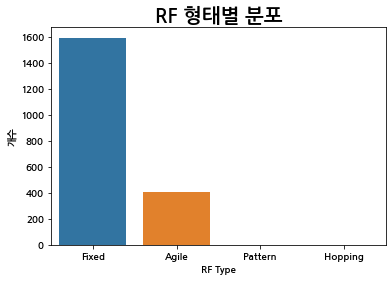

In [10]:
plt.figure()
plt.title( 'RF 형태별 분포', fontsize=20)
sns.barplot( data=n_df, x='RF Type', y='개수' )
plt.show()

In [15]:
n_df

,RF Type,개수
0,Fixed,1592
1,Agile,408
2,Pattern,0
3,Hopping,0


# PRI 형태별 위협 라이브러리 분포

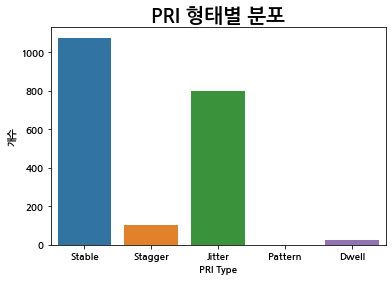

In [11]:
FP_Type = [1.0, 2.0, 3.0, 4.0, 5.0]
m_fp_type_count = []
for x in FP_Type :
    m_fp_type_count.append( (n_df_1['PRI Type'] == x ).sum() )
    
data = { 'PRI Type' : ['Stable', 'Stagger', 'Jitter', 'Pattern', 'Dwell'], '개수' : m_fp_type_count }
n_df = pd.DataFrame( data )

plt.figure()
plt.title( 'PRI 형태별 분포',fontsize=20)
sns.barplot( data=n_df, x='PRI Type', y='개수' )
plt.show()


In [17]:
n_df

,PRI Type,개수
0,Stable,1075
1,Stagger,101
2,Jitter,799
3,Pattern,0
4,Dwell,25


# Scan 형태별 위협 라이브러리 분포

<AxesSubplot:title={'center':'스캔 형태별 분포'}, xlabel='스캔 형태', ylabel='개수'>

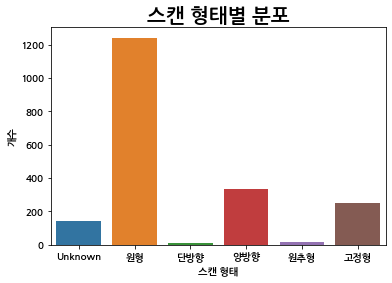

In [12]:
Scan_Type = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
m_fp_type_count = []
for x in Scan_Type :
    m_fp_type_count.append( (n_df_1['AS Type'] == x ).sum() )
    
data = { '스캔 형태' : ['Unknown', '원형', '단방향', '양방향', '원추형', '고정형'], '개수' : m_fp_type_count }
n_df = pd.DataFrame( data )

plt.figure()
plt.title( '스캔 형태별 분포', fontsize=20)
sns.barplot( data=n_df, x='스캔 형태', y='개수' )

In [13]:
n_df

,스캔 형태,개수
0,Unknown,142
1,원형,1241
2,단방향,14
3,양방향,332
4,원추형,19
5,고정형,252


# Category 별 분포

<AxesSubplot:title={'center':'Category별 분포'}, xlabel='Category 형태', ylabel='개수'>

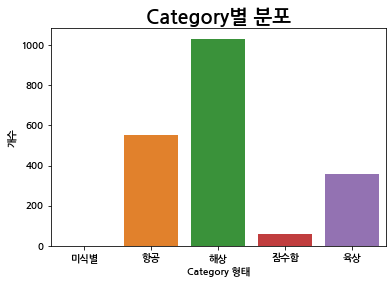

In [15]:
#n_df_1.sort_values('No')
#len( n_df_1 )
#print( n_df_1['Category'] )

Category_Type = [0.0, 1.0, 2.0, 3.0, 4.0]
m_category_type_count = []
for x in Category_Type :
    m_category_type_count.append( (n_df_1['Category'] == x ).sum() )
    
data = { 'Category 형태' : ['미식별', '항공', '해상', '잠수함', '육상'], '개수' : m_category_type_count }
n_df = pd.DataFrame( data )

plt.figure()
plt.title( 'Category별 분포', fontsize=20)
sns.barplot( data=n_df, x='Category 형태', y='개수' )

In [12]:
n_df

,Category 형태,개수
0,미식별,0
1,항공,552
2,해상,1031
3,잠수함,58
4,육상,359


# 위협 라이브러리 주파수 대역폭 히스토그램

<AxesSubplot:title={'center':'주파수 대역폭 히스토그램'}, xlabel='주파수 대역폭[KHz]', ylabel='개수'>

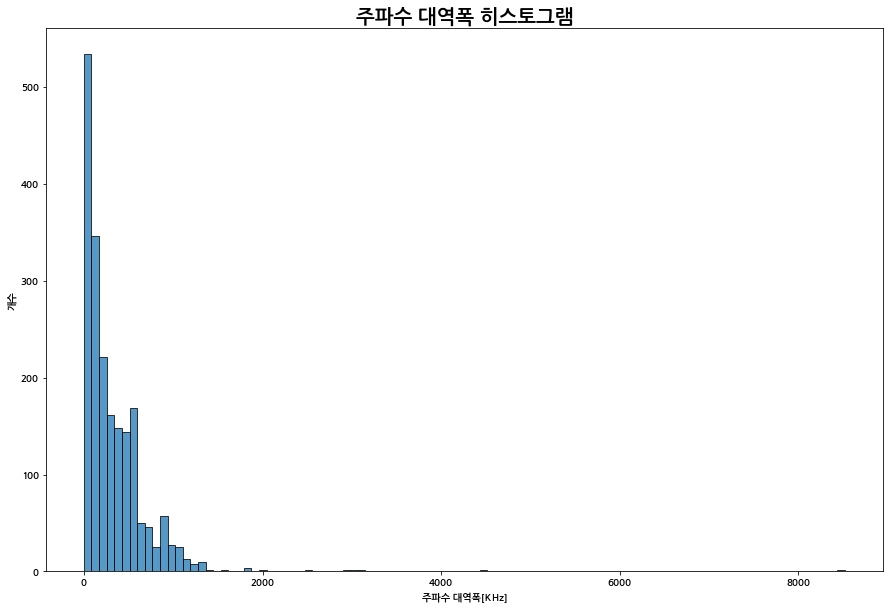

In [16]:
plt.figure( figsize=(15,10) )
#plt.yscale('log')
plt.title( '주파수 대역폭 히스토그램', fontsize=20)
plt.xlabel( '주파수 대역폭[KHz]')
plt.ylabel( '개수')
#plt.xlim( 0, -1 )
#plt.ylim( 0, 700 )
sns.histplot( n_df_1['Delta Freq(MHz)'], bins=100 )

<AxesSubplot:title={'center':'주파수 대역폭 히스토그램'}, xlabel='주파수 대역폭[KHz]', ylabel='Count'>

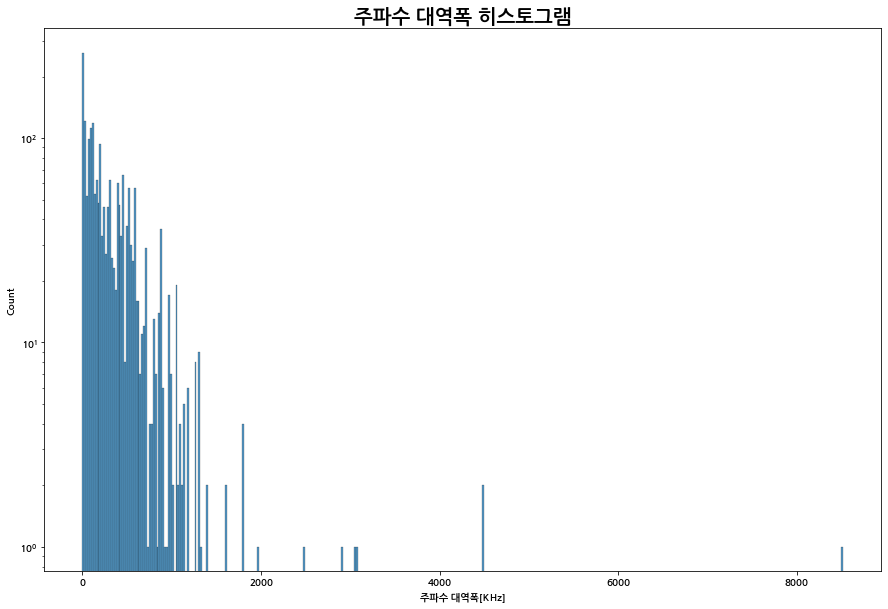

In [17]:
plt.figure( figsize=(15,10) )
plt.yscale('log')
plt.title( '주파수 대역폭 히스토그램', fontsize=20)
plt.xlabel( '주파수 대역폭[KHz]')
#plt.xlim( 500,  )
sns.histplot( n_df_1['Delta Freq(MHz)'], bins=400 )

주파수 경계에 포함한 개수 : 1979, 비율: 99.00%


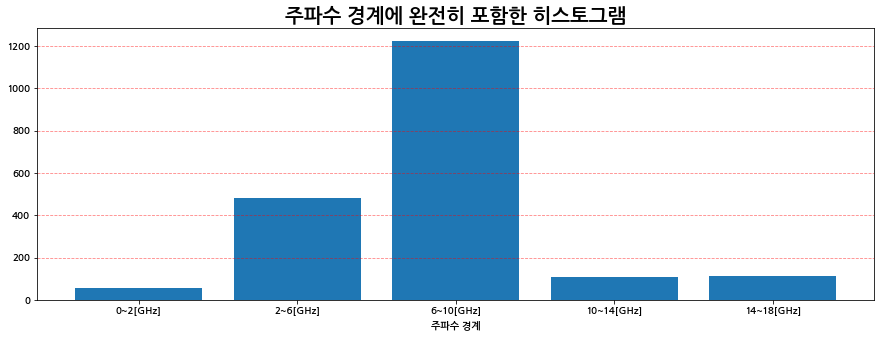

In [18]:
def CheckRange( x, range ):
    #print( x, range )
    if x >= range[0] and x <= range[1]:
        return True
    else:
        return False

#n_df_1.sort_values('No')
n_df_1 = n_df_1.sort_values(by=['No'], ascending=True)

# X축 명 네이밍
freq_x = []
for i in range(0, 18, 4):
    if i == 0:
        freq_x.append( '{}~{}[GHz]'.format(i, i+2) )
    else:
        freq_x.append( '{}~{}[GHz]'.format(i-2, i+2) )
#print( freq_x )
    
# 히스토그램 값 초기화
freq_hist = []
for i in range(0, 18, 4):
    freq_hist.append( 0 )    
#print( freq_hist )

# 주파수 경계 설정
freq_range = []
for i in range(0,18000, 4000):
    if i == 0:
        freq_range.append( [ i, i+2000 ])
    else:
        freq_range.append( [ i-2000, i+2000 ])
        
# print( freq_range )    

# 주파수 경계 카운트
#print( len(freq_range) )
freq_hist_tf = []
freq_hist_tf.append( True )
for i in range(1, len(n_df_1)+1 ):
    j = 0
    bCheckRange = False
    for freq_rangexy in freq_range:
        value = [ n_df_1.loc[i,'FreqLow(MHz)'], n_df_1.loc[i,'FreqHigh(MHz)'] ]
        #print( value )
        if CheckRange( value[0], freq_rangexy ) and CheckRange( value[1], freq_rangexy ):
            #print( i, value, freq_rangexy )
            freq_hist[j] += 1
            bCheckRange = True
            break
        else:
            j = j + 1
            
#if bCheckRange == False:
#print( i, value, freq_rangexy )
       
    freq_hist_tf.append( bCheckRange )
        
#print( freq_hist_tf ) 

plt.figure( figsize=(15,5) )
plt.title( '주파수 경계에 완전히 포함한 히스토그램', fontsize=20)
plt.xlabel( '주파수 경계')
plt.bar( freq_x, freq_hist )
plt.grid( True, axis='y',color='red', alpha=0.5,linestyle='--')

print( '주파수 경계에 포함한 개수 : {}, 비율: {:.2f}%'.format( np.sum(freq_hist), (np.sum(freq_hist)*100)/(len(n_df_1)-1) ) )

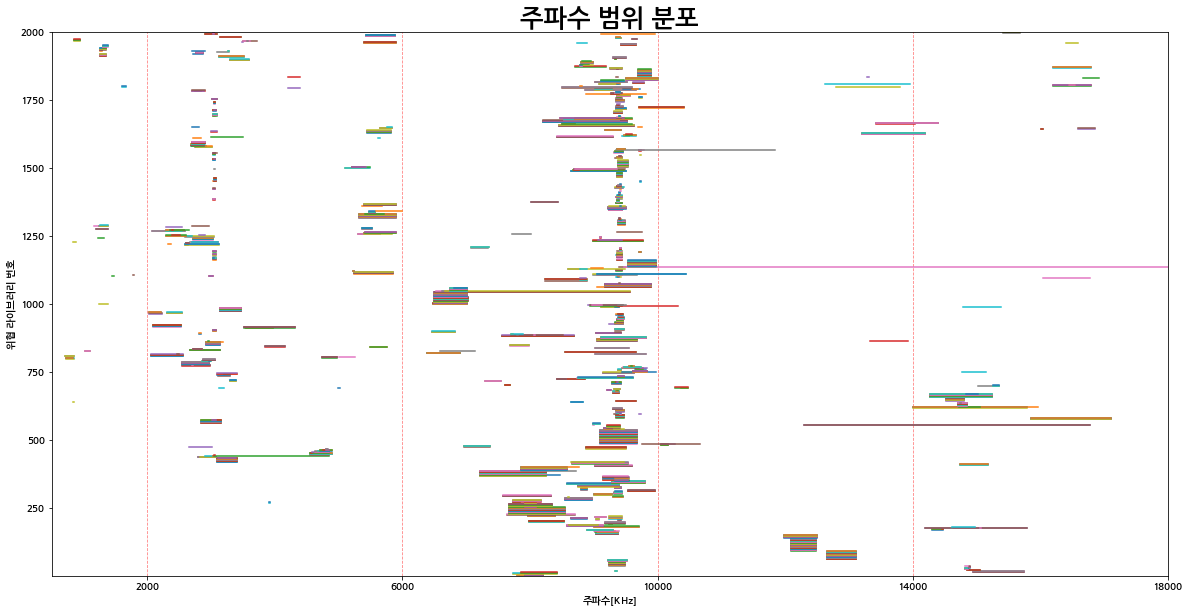

In [19]:
#n_df_1.sort_values('No')
n_df_1 = n_df_1.sort_values(by=['FreqLow(MHz)'], ascending=True)
#print( n_df_1.loc[2000,'FreqLow(MHz)'] )
#print( len(n_df_1) )

fig = plt.figure( figsize=(20,10))
ax = fig.add_subplot( 1, 1, 1 )
for i in range(1, len(n_df_1) ):
    x = [ n_df_1.loc[i,'FreqLow(MHz)'], n_df_1.loc[i,'FreqHigh(MHz)'] ]
    y = [ i, i ]
    #pass
    #print( i )
    #print( "{}, Low: {}, High: {}".format( i, n_df_1['FreqLow(MHz)'][i], n_df_1['FreqHigh(MHz)'][i] ) )
    #print( "{}, Low: {}, High: {}".format( i, n_df_1.loc[i,'FreqLow(MHz)'], n_df_1.loc[i,'FreqLow(MHz)'] ) )
    ax.plot( x, y )
    
ax.grid( True, axis='x',color='red', alpha=0.5,linestyle='--')
ax.set_xticks( [ i for i in range( 2000, 18000+1, 4000 ) ] )
plt.title( '주파수 범위 분포', fontsize=25)    
plt.xlabel( '주파수[KHz]')
plt.ylabel( '위협 라이브러리 번호')
plt.xlim( 500, 18000 )
plt.ylim( 1, len(n_df_1) )
plt.show()    


In [25]:
n_df_1

,Pulse Type,RF Type,FreqLow(MHz),FreqHigh(MHz),CenterFreq(MHz),Delta Freq(MHz),SwitchLevel,PatternType,PatternPeriodLow(usec),PatternPeriodHigh(usec),PRI Type,PRILow(usec),PRIHigh(usec),CenterPRI(usec),Delta PRI(usec),PRF Low(usec),PRF High(usec),Jitter(%),Stagger/\nSwitch\nLevel,Pattern\nType,Jamming Tech2,Jamming Tech1,Pattern\nPeriod\nLow\n(usec),Pattern\nPeriod\nHigh\n(usec),PW Low(usec),PW High(usec),CenterPW(usec),Delta PW(usec),AS Type,AS Low(usec),AS High(usec),Threat\nLevel,DeleteTime(sec),EmitterNotation,RadarMode Name,Category,First Tech No,Second Tech No,Jamming Threshold,Dwell Freq1 Low(MHz),Dwell Freq1 High(MHz),Dwell Freq2 Low(MHz),Dwell Freq2 High(MHz),Dwell Freq3 Low(MHz),Dwell Freq3 High(MHz),Dwell Freq4 Low(MHz),Dwell Freq4 High(MHz),Dwell Freq5 Low(MHz),Dwell Freq5 High(MHz),Dwell Freq6 Low(MHz),Dwell Freq6 High(MHz),Dwell Freq7 Low(MHz),Dwell Freq7 High(MHz),Dwell Freq8 Low(MHz),Dwell Freq8 High(MHz),Dwell Freq9 Low(MHz),Dwell Freq9 High(MHz),Dwell Freq10 Low(MHz),Dwell Freq10 High(MHz),Dwell Freq11 Low(MHz),Dwell Freq11 High(MHz),Dwell Freq12 Low(MHz),Dwell Freq12 High(MHz),Dwell Freq13 Low(MHz),Dwell Freq13 High(MHz),Dwell Freq14 Low(MHz),Dwell Freq14 High(MHz),Dwell Freq15 Low(MHz),Dwell Freq15 High(MHz),Dwell Freq16 Low(MHz),Dwell Freq16 High(MHz),SD Value1 Low(MHz),SD Value1 High(MHz),SD Value2 Low(MHz),SD Value2 High(MHz),SD Value3 Low(MHz),SD Value3 High(MHz),SD Value4 Low(MHz),SD Value4 High(MHz),SD Value5 Low(MHz),SD Value5 High(MHz),SD Value6 Low(MHz),SD Value6 High(MHz),SD Value7 Low(MHz),SD Value7 High(MHz),SD Value8 Low(MHz),SD Value8 High(MHz),SD Value9 Low(MHz),SD Value9 High(MHz),SD Value10 Low(MHz),SD Value10 High(MHz),SD Value11 Low(MHz),SD Value11 High(MHz),SD Value12 Low(MHz),SD Value12 High(MHz),SD Value13 Low(MHz),SD Value13 High(MHz),SD Value14 Low(MHz),SD Value14 High(MHz),SD Value15 Low(MHz),SD Value15 High(MHz),SD Value16 Low(MHz),SD Value16 High(MHz),Auto\nWarning,ERP(W),Platform 1 No,Platform 1 Name,Platform 2 No,Platform 2 Name,Platform 3 No,Platform 3 Name,Platform 4 No,Platform 4 Name,Platform 5 No,Platform 5 Name
No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
809.0,1.0,2.0,715.0,847.0,781.0,132.0,0.0,0.0,0.0,0.0,3.0,510.0,575.0,542.5,65.0,1739.1,1960.8,10.0,0.0,0.0,-1,-1,0.0,0.0,0.2,1.0,0.60,0.8,0.0,100000.0,20000000.0,7.0,0.0,B342Z,FAN SONG E,4.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,SA-2,2.0,GUIDELIN,3.0,-,4.0,-,5.0,-
808.0,1.0,2.0,715.0,847.0,781.0,132.0,0.0,0.0,0.0,0.0,3.0,5435.0,5618.0,5526.5,183.0,178.0,184.0,10.0,0.0,0.0,-1,-1,0.0,0.0,0.6,1.4,1.00,0.8,0.0,100000.0,20000000.0,7.0,0.0,B342Z,FAN SONG E,4.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,SA-2,2.0,GUIDELIN,3.0,-,4.0,-,5.0,-
802.0,1.0,1.0,720.0,840.0,780.0,120.0,0.0,0.0,0.0,0.0,1.0,396.0,714.0,555.0,318.0,1400.6,2525.3,0.0,0.0,0.0,-1,-1,0.0,0.0,0.2,0.5,0.35,0.3,5.0,0.0,0.0,7.0,0.0,B336B,GIN SLING,4.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,SA-2,2.0,GUIDELIN,3.0,-,4.0,-,5.0,-
801.0,1.0,1.0,720.0,840.0,780.0,120.0,0.0,0.0,0.0,0.0,3.0,5650.0,6329.0,5989.5,679.0,158.0,177.0,10.0,0.0,0.0,-1,-1,0.0,0.0,0.9,1.1,1.00,0.2,5.0,0.0,0.0,7.0,0.0,B336B,GIN SLING,4.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [20]:
len(n_df_1)
print( n_df_1['RadarMode Name'] )
print( n_df_1.loc[100,'RadarMode Name'] )

No
809.0      FAN SONG E
808.0      FAN SONG E
802.0       GIN SLING
801.0       GIN SLING
800.0     FAN SONG BF
             ...     
1807.0     AN/APQ-126
1806.0     AN/APQ-126
1646.0         OPS-22
1645.0         OPS-22
1833.0      AN/DSQ-28
Name: RadarMode Name, Length: 2000, dtype: object
HIGH LARK 1


    IPL 번호       에미터명  카테고리  최소 주파수  최대 주파수
0      476  POP GROUP   2.0  6967.0  7375.0
1      477  POP GROUP   2.0  6967.0  7375.0
2      478  POP GROUP   2.0  6967.0  7375.0
3      479  POP GROUP   2.0  6967.0  7375.0
4      480  POP GROUP   2.0  6967.0  7375.0
..     ...        ...   ...     ...     ...
72    1060    SR47B-G   2.0  6751.0  7020.0
73    1061    SR47B-G   2.0  6809.0  7020.0
74    1208    NO Name   4.0  7071.0  7348.0
75    1209    NO Name   4.0  7080.5  7355.4
76    1210    NO Name   4.0  7074.0  7351.0

[77 rows x 5 columns]


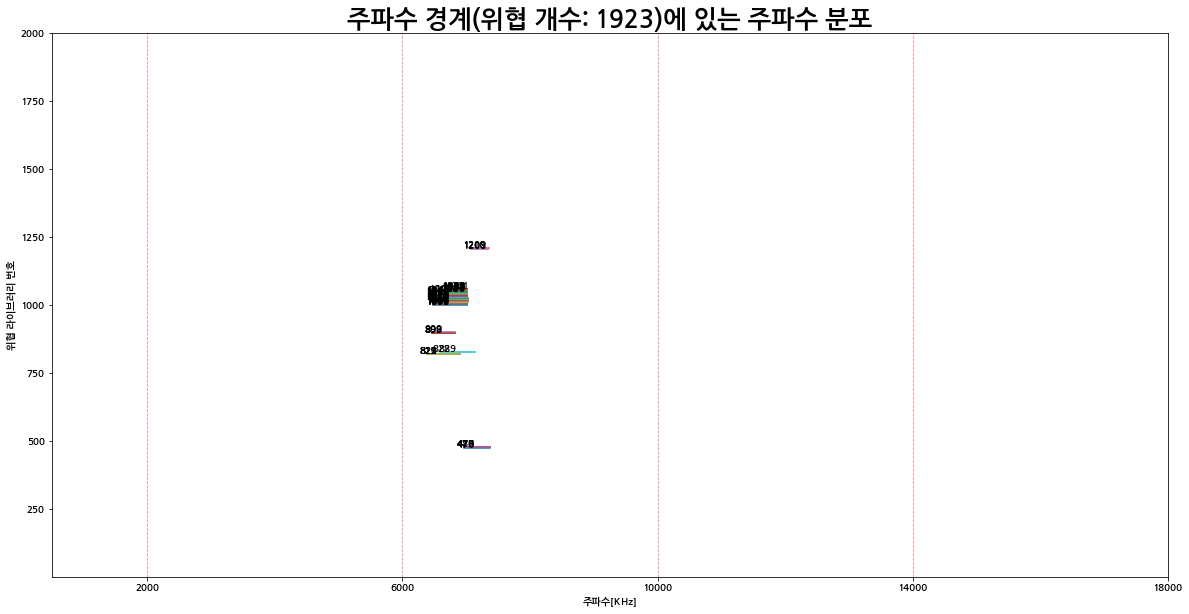

In [34]:
#n_df_1 = n_df_1.sort_values('No')
n_df_1 = n_df_1.sort_values(by=['No'], ascending=True)
#print( n_df_1.loc[2000,'FreqLow(MHz)'] )
#print( len(n_df_1) )

data_set = []
fig = plt.figure( figsize=(20,10))
ax = fig.add_subplot( 1, 1, 1 )
for i in range(1, len(n_df_1)+1 ):
    if freq_hist_tf[i] == True:
        x = [ n_df_1.loc[i,'FreqLow(MHz)'], n_df_1.loc[i,'FreqHigh(MHz)'] ]
        y = [ i, i ]
        ax.plot( x, y )
        data = [ i, n_df_1.loc[i,'RadarMode Name'], n_df_1.loc[i,'Category'], n_df_1.loc[i,'FreqLow(MHz)'], n_df_1.loc[i,'FreqHigh(MHz)'] ]
        if data in data_set:
            #pass
            print( data_set )    
        else:
            data_set.append( data )
        #strText ='IPL No: {} Emitter Name: {}'.format(i, n_df_1.loc[i,'RadarMode Name'] )
        strText ='{}'.format(i)
        ax.annotate( strText, xy=(x[0]-120, y[0]), rotation=0, fontsize=10 )
        #print( strText )
    
#print( data_set )    
data_df = pd.DataFrame( data_set, columns=['IPL 번호', '에미터명', '카테고리', '최소 주파수', '최대 주파수'])
print( data_df )
ax.grid( True, axis='x',color='red', alpha=0.5,linestyle='--')
ax.set_xticks( [ i for i in range( 2000, 18000+1, 4000 ) ] )
plt.title( '주파수 경계(위협 개수: {})에 있는 주파수 분포'.format( freq_hist_tf.count(False)), fontsize=25)    
plt.xlabel( '주파수[KHz]')
plt.ylabel( '위협 라이브러리 번호')
plt.xlim( 500, 18000 )
plt.ylim( 1, len(n_df_1) )
plt.show()    

# 6.0 ~ 7.5 GHz 범위에 겹쳐진 위협명

In [27]:
def CheckRange( x, range ):
    #print( x, range )
    if x >= range[0] and x <= range[1]:
        return True
    else:
        return False

#n_df_1.sort_values('No')
n_df_1 = n_df_1.sort_values(by=['No'], ascending=True)

# X축 명 네이밍
freq_x = []
for i in range(0, 18, 4):
    if i == 0:
        freq_x.append( '{}~{}[GHz]'.format(i, i+2) )
    else:
        freq_x.append( '{}~{}[GHz]'.format(i-2, i+2) )
#print( freq_x )
    
# 히스토그램 값 초기화
freq_hist = []
for i in range(0, 18, 4):
    freq_hist.append( 0 )    
#print( freq_hist )

# 주파수 경계 설정
freq_range = []
freq_range.append( [ 6000, 7500 ])
        
# print( freq_range )    

# 주파수 경계 카운트
#print( len(freq_range) )
freq_hist_tf = []
freq_hist_tf.append( True )
for i in range(1, len(n_df_1)+1 ):
    j = 0
    bCheckRange = False
    for freq_rangexy in freq_range:
        value = [ n_df_1.loc[i,'FreqLow(MHz)'], n_df_1.loc[i,'FreqHigh(MHz)'] ]
        #print( value )
        if CheckRange( value[0], freq_rangexy ) and CheckRange( value[1], freq_rangexy ):
            #print( i, value, freq_rangexy )
            freq_hist[j] += 1
            bCheckRange = True
            break
        else:
            j = j + 1
            
    freq_hist_tf.append( bCheckRange )            
            
    if bCheckRange == True:
        print( i, value, freq_rangexy )    
        
#print( freq_hist_tf ) 

print( '주파수 경계에 포함한 개수 : {}, 비율: {:.2f}%'.format( np.sum(freq_hist), (np.sum(freq_hist)*100)/(len(n_df_1)-1) ) )

476 [6967.0, 7375.0] [6000, 7500]
477 [6967.0, 7375.0] [6000, 7500]
478 [6967.0, 7375.0] [6000, 7500]
479 [6967.0, 7375.0] [6000, 7500]
480 [6967.0, 7375.0] [6000, 7500]
819 [6390.0, 6905.0] [6000, 7500]
820 [6390.0, 6905.0] [6000, 7500]
821 [6390.0, 6905.0] [6000, 7500]
822 [6390.0, 6905.0] [6000, 7500]
828 [6594.0, 7144.0] [6000, 7500]
829 [6693.0, 6700.0] [6000, 7500]
897 [6462.0, 6828.0] [6000, 7500]
898 [6462.0, 6828.0] [6000, 7500]
899 [6462.0, 6828.0] [6000, 7500]
900 [6462.0, 6828.0] [6000, 7500]
1000 [6486.0, 7020.0] [6000, 7500]
1001 [6486.0, 7020.0] [6000, 7500]
1002 [6486.0, 7020.0] [6000, 7500]
1003 [6486.0, 7020.0] [6000, 7500]
1004 [6486.0, 7020.0] [6000, 7500]
1005 [6489.0, 7020.0] [6000, 7500]
1006 [6490.0, 7020.0] [6000, 7500]
1007 [6490.0, 7020.0] [6000, 7500]
1008 [6490.0, 7020.0] [6000, 7500]
1009 [6490.0, 7020.0] [6000, 7500]
1010 [6490.0, 7020.0] [6000, 7500]
1011 [6490.0, 7020.0] [6000, 7500]
1012 [6490.0, 7025.0] [6000, 7500]
1013 [6490.0, 7025.0] [6000, 7500]


In [65]:
n_df_1

,Pulse Type,RF Type,FreqLow(MHz),FreqHigh(MHz),CenterFreq(MHz),Delta Freq(MHz),SwitchLevel,PatternType,PatternPeriodLow(usec),PatternPeriodHigh(usec),PRI Type,PRILow(usec),PRIHigh(usec),CenterPRI(usec),Delta PRI(usec),PRF Low(usec),PRF High(usec),Jitter(%),Stagger/Switch Level,PRI Pattern Type,Jamming Tech2,Jamming Tech1,PRI PatternPeriodLow(usec),PRI PatternPeriodHigh(usec),PW Low(usec),PW High(usec),CenterPW(usec),Delta PW(usec),AS Type,AS Low(usec),AS High(usec),Threat\nLevel,DeleteTime(sec),EmitterNotation,RadarMode Name,Category,First Tech No,Second Tech No,Jamming Threshold,Dwell Freq1 Low(MHz),Dwell Freq1 High(MHz),Dwell Freq2 Low(MHz),Dwell Freq2 High(MHz),Dwell Freq3 Low(MHz),Dwell Freq3 High(MHz),Dwell Freq4 Low(MHz),Dwell Freq4 High(MHz),Dwell Freq5 Low(MHz),Dwell Freq5 High(MHz),Dwell Freq6 Low(MHz),Dwell Freq6 High(MHz),Dwell Freq7 Low(MHz),Dwell Freq7 High(MHz),Dwell Freq8 Low(MHz),Dwell Freq8 High(MHz),Dwell Freq9 Low(MHz),Dwell Freq9 High(MHz),Dwell Freq10 Low(MHz),Dwell Freq10 High(MHz),Dwell Freq11 Low(MHz),Dwell Freq11 High(MHz),Dwell Freq12 Low(MHz),Dwell Freq12 High(MHz),Dwell Freq13 Low(MHz),Dwell Freq13 High(MHz),Dwell Freq14 Low(MHz),Dwell Freq14 High(MHz),Dwell Freq15 Low(MHz),Dwell Freq15 High(MHz),Dwell Freq16 Low(MHz),Dwell Freq16 High(MHz),SD Value1 Low(MHz),SD Value1 High(MHz),SD Value2 Low(MHz),SD Value2 High(MHz),SD Value3 Low(MHz),SD Value3 High(MHz),SD Value4 Low(MHz),SD Value4 High(MHz),SD Value5 Low(MHz),SD Value5 High(MHz),SD Value6 Low(MHz),SD Value6 High(MHz),SD Value7 Low(MHz),SD Value7 High(MHz),SD Value8 Low(MHz),SD Value8 High(MHz),SD Value9 Low(MHz),SD Value9 High(MHz),SD Value10 Low(MHz),SD Value10 High(MHz),SD Value11 Low(MHz),SD Value11 High(MHz),SD Value12 Low(MHz),SD Value12 High(MHz),SD Value13 Low(MHz),SD Value13 High(MHz),SD Value14 Low(MHz),SD Value14 High(MHz),SD Value15 Low(MHz),SD Value15 High(MHz),SD Value16 Low(MHz),SD Value16 High(MHz),Auto\nWarning,ERP(W),Platform 1 No,Platform 1 Name,Platform 2 No,Platform 2 Name,Platform 3 No,Platform 3 Name,Platform 4 No,Platform 4 Name,Platform 5 No,Platform 5 Name
No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,2.0,7800.0,8210.0,8005.0,410.0,0.0,0.0,0.0,0.0,3.0,587.0,593.0,590.0,6.0,1686.3,1703.6,5.0,0.0,0.0,1,5,0.0,0.0,0.4,0.8,0.6,0.4,5.0,0.0,0.0,9.0,0.0,A374A,No Name,1.0,1761.0,531.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,STYX,2.0,-,3.0,-,4.0,-,5.0,-
2.0,1.0,1.0,7800.0,8210.0,8005.0,410.0,0.0,0.0,0.0,0.0,3.0,587.0,593.0,590.0,6.0,1686.3,1703.6,5.0,0.0,0.0,1,5,0.0,0.0,0.4,0.8,0.6,0.4,5.0,0.0,0.0,9.0,0.0,A374A,No Name,1.0,1761.0,531.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,STYX,2.0,-,3.0,-,4.0,-,5.0,-
3.0,1.0,2.0,7927.0,8210.0,8068.5,283.0,0.0,0.0,0.0,0.0,3.0,509.0,638.0,573.5,129.0,1567.4,1964.6,5.0,0.0,0.0,1,5,0.0,0.0,0.4,0.8,0.6,0.4,5.0,0.0,0.0,9.0,0.0,A374A,No Name,1.0,1761.0,531.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,STYX,2.0,-,3.0,-,4.0,-,5.0,-
4.0,1.0,2.0,7927.0,8210.0,8068.5,283.0,0.0,0.0,0.0,0.0,3.0,509.0,638.0,573.5,129.0,1567.4,1964.6,5.0,0.0,0.0,5,1,0.0,0.0,0.4,0.8,0.6,0.4,3.0,1800000.0,2300000.0,9.0,0.0,A374A,No Name,1.0,530.0,1750.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

    IPL 번호         레이더명  ELNOT 카테고리     RF형태    PRI형태     스캔형태  최소 주파수  최대 주파수
0      476    POP GROUP  F316A   해상    Agile  Stagger       원형  6967.0  7375.0
1      477    POP GROUP  F316A   해상    Agile  Stagger       원형  6967.0  7375.0
2      478    POP GROUP  F316A   해상    Agile  Stagger       원형  6967.0  7375.0
3      479    POP GROUP  F316A   해상    Agile  Stagger       원형  6967.0  7375.0
4      480    POP GROUP  F316A   해상    Agile  Stagger       원형  6967.0  7375.0
5      819  THIN SKIN A  B376A   육상    Agile  Stagger      양방향  6390.0  6905.0
6      820  THIN SKIN A  B376A   육상    Agile  Stagger      양방향  6390.0  6905.0
7      821  THIN SKIN A  B376A   육상    Agile  Stagger      양방향  6390.0  6905.0
8      822  THIN SKIN A  B376A   육상    Agile  Pattern      양방향  6390.0  6905.0
9      828  SQUARE PAIR  B425A   육상    Agile  Pattern  Unknown  6594.0  7144.0
10     829      No Name  B425B   육상    Agile  Pattern      고정형  6693.0  6700.0
11     897     MUFF COB  C316Z   해상    Agile  Stagge

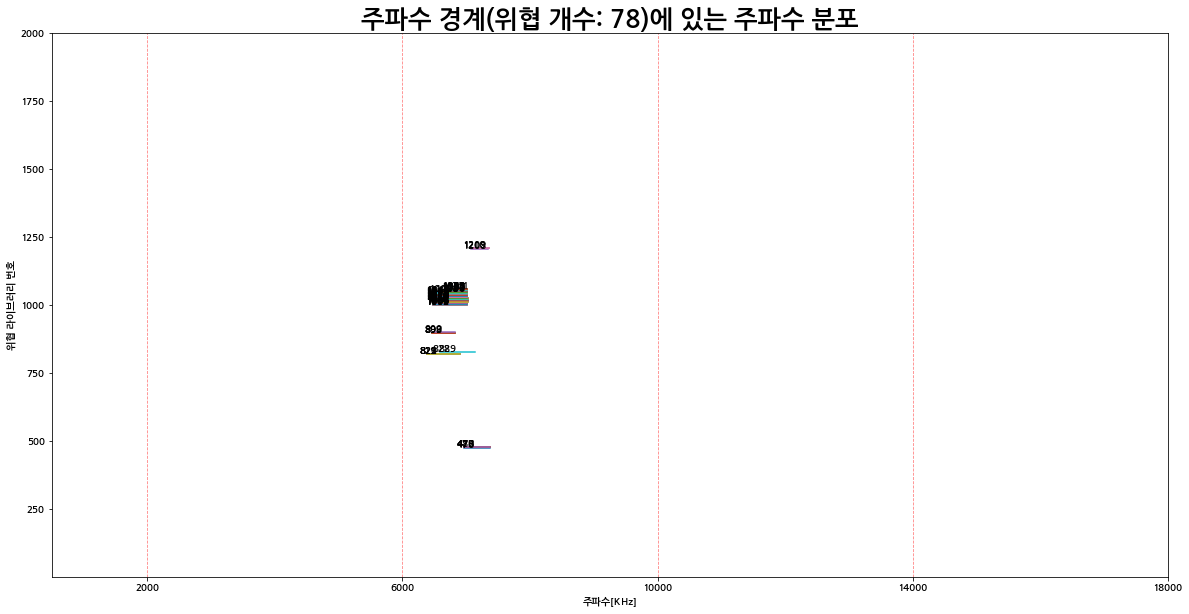

In [72]:
szCategory=['미식별', '항공', '해상', '잠수함', '육상']
szRFType= [ 'Fixed', 'Agile', 'Pattern', 'Hopping']
szPRIType= ['Stable', 'Stagger', 'Jitter', 'Pattern', 'Dwell']
szScanType= ['Unknown', '원형', '단방향', '양방향', '원추형', '고정형']

#n_df_1 = n_df_1.sort_values('No')
n_df_1 = n_df_1.sort_values(by=['No'], ascending=True)
#print( n_df_1.loc[2000,'FreqLow(MHz)'] )
#print( len(n_df_1) )

data_set = []
fig = plt.figure( figsize=(20,10))
ax = fig.add_subplot( 1, 1, 1 )
for i in range(1, len(n_df_1)+1 ):
    if freq_hist_tf[i] == True:
        x = [ n_df_1.loc[i,'FreqLow(MHz)'], n_df_1.loc[i,'FreqHigh(MHz)'] ]
        y = [ i, i ]
        ax.plot( x, y )
        data = [ i, n_df_1.loc[i,'RadarMode Name'], n_df_1.loc[i,'EmitterNotation'], szCategory[int(n_df_1.loc[i,'Category'])], szRFType[int(n_df_1.loc[i,'RF Type'])], szPRIType[int(n_df_1.loc[i,'PRI Type'])], szScanType[int(n_df_1.loc[i,'AS Type'])], n_df_1.loc[i,'FreqLow(MHz)'], n_df_1.loc[i,'FreqHigh(MHz)'] ]
        if data in data_set:
            #pass
            print( data_set )    
        else:
            data_set.append( data )
        #strText ='IPL No: {} Emitter Name: {}'.format(i, n_df_1.loc[i,'RadarMode Name'] )
        strText ='{}'.format(i)
        ax.annotate( strText, xy=(x[0]-120, y[0]), rotation=0, fontsize=10 )
        #print( strText )
    
#print( data_set )    
data_df = pd.DataFrame( data_set, columns=['IPL 번호', '레이더명', 'ELNOT', '카테고리', 'RF형태', 'PRI형태', '스캔형태', '최소 주파수', '최대 주파수'])
print( data_df )
ax.grid( True, axis='x',color='red', alpha=0.5,linestyle='--')
ax.set_xticks( [ i for i in range( 2000, 18000+1, 4000 ) ] )
plt.title( '주파수 경계(위협 개수: {})에 있는 주파수 분포'.format( freq_hist_tf.count(True)), fontsize=25)    
plt.xlabel( '주파수[KHz]')
plt.ylabel( '위협 라이브러리 번호')
plt.xlim( 500, 18000 )
plt.ylim( 1, len(n_df_1) )
plt.show()    

In [75]:
data_df.to_excel( 'test.xlsx', index=False )

In [58]:

df_unique = data_df.groupby( ['레이더명', 'ELNOT', '카테고리'] ).size().reset_index()

print( df_unique )

          레이더명  ELNOT 카테고리   0
0     MUFF COB  C316Z   해상   4
1      NO Name  F304C   육상   3
2      No Name  B425B   육상   1
3    POP GROUP  F316A   해상   5
4  SQUARE PAIR  B425A   육상   1
5      SR47B-G  C412A   해상  59
6  THIN SKIN A  B376A   육상   4


# 위협 라이브러리 중심 주파수 히스토그램

<AxesSubplot:title={'center':'중심 주파수 히스토그램'}, xlabel='주파수[KHz]', ylabel='개수'>

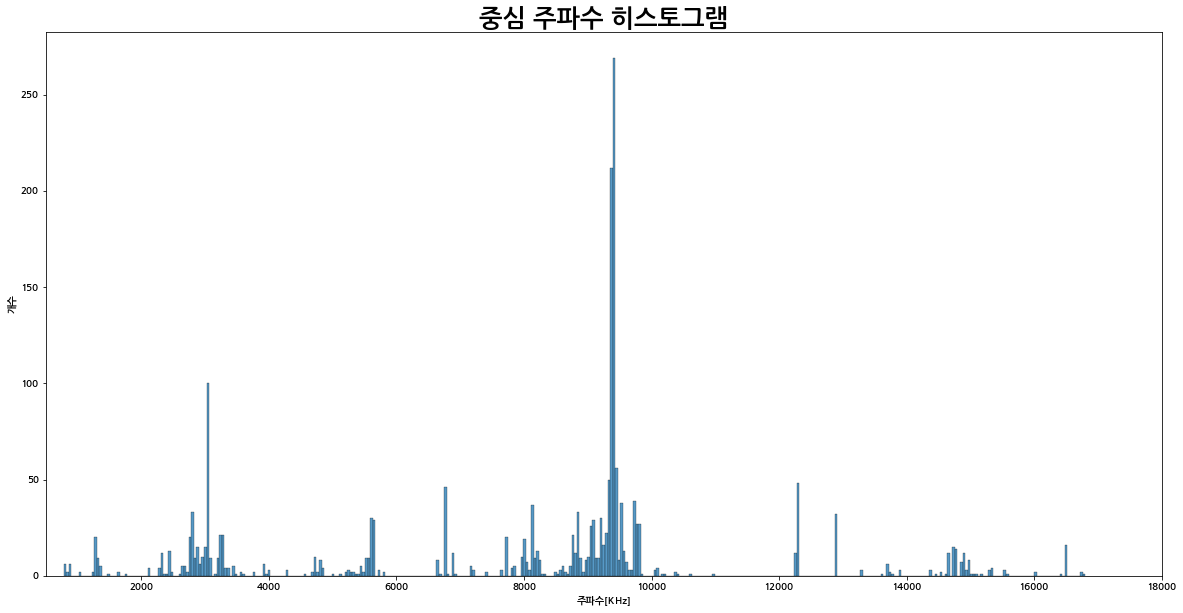

In [28]:
plt.figure( figsize=(20,10) )
#plt.yscale('log')
plt.title( '중심 주파수 히스토그램', fontsize=25)    
plt.xlabel( '주파수[KHz]')
plt.ylabel( '개수')
plt.xlim( 500, 18000 )
sns.histplot( n_df_1['CenterFreq(MHz)'], bins=400 )

# 펄스폭 분석

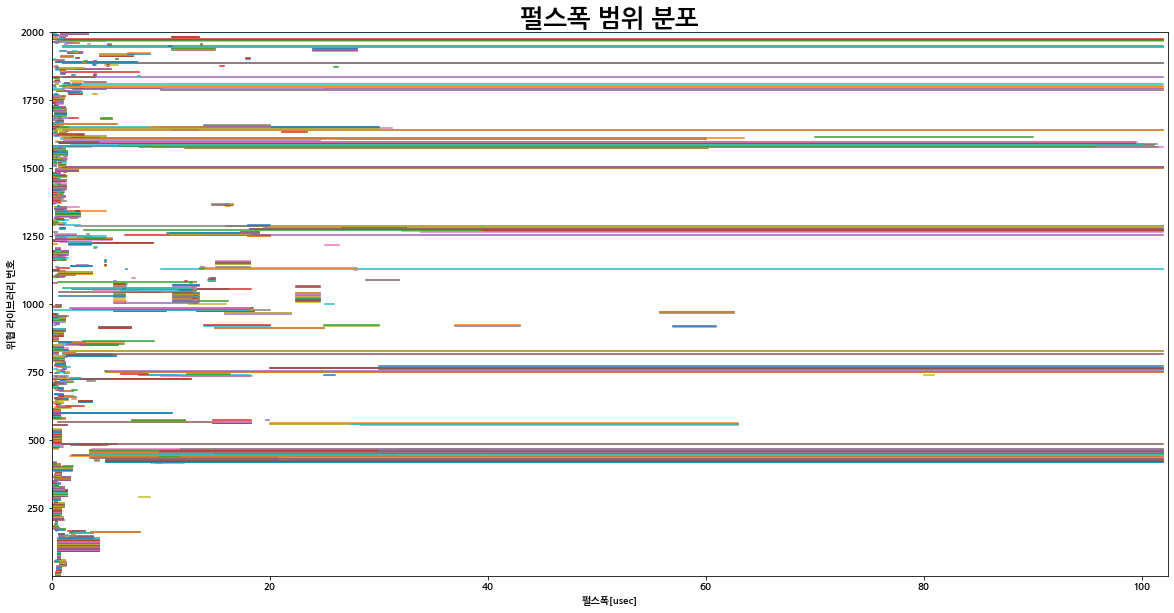

In [39]:
#n_df_1.sort_values('No')
n_df_1 = n_df_1.sort_values(by=['PW Low(usec)'], ascending=True)
#print( n_df_1.loc[2000,'FreqLow(MHz)'] )
#print( len(n_df_1) )

fig = plt.figure( figsize=(20,10))
ax = fig.add_subplot( 1, 1, 1 )
for i in range(1, len(n_df_1) ):
    x = [ n_df_1.loc[i,'PW Low(usec)'], n_df_1.loc[i,'PW High(usec)'] ]
    y = [ i, i ]
    #pass
    #print( i )
    #print( "{}, Low: {}, High: {}".format( i, n_df_1['FreqLow(MHz)'][i], n_df_1['FreqHigh(MHz)'][i] ) )
    #print( "{}, Low: {}, High: {}".format( i, n_df_1.loc[i,'FreqLow(MHz)'], n_df_1.loc[i,'FreqLow(MHz)'] ) )
    ax.plot( x, y )
    
#ax.grid( True, axis='x',color='red', alpha=0.5,linestyle='--')
#ax.set_xticks( [ i for i in range( 2000, 18000+1, 4000 ) ] )
plt.title( '펄스폭 범위 분포', fontsize=25)    
plt.xlabel( '펄스폭[usec]')
plt.ylabel( '위협 라이브러리 번호')
plt.xlim( 0, max( n_df_1['PW High(usec)']) )
plt.ylim( 1, len(n_df_1) )
plt.show()    

<AxesSubplot:title={'center':'중심 펄스폭 히스토그램'}, xlabel='펄스폭[usec]', ylabel='개수'>

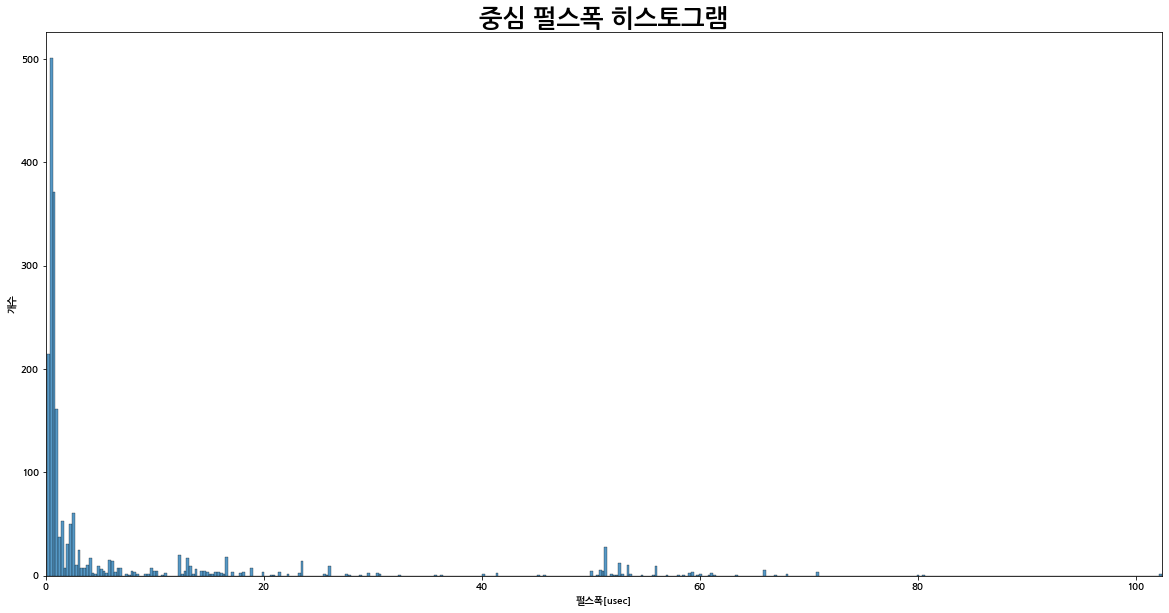

In [42]:
plt.figure( figsize=(20,10) )
#plt.yscale('log')
plt.title( '중심 펄스폭 히스토그램', fontsize=25)    
plt.xlabel( '펄스폭[usec]')
plt.ylabel( '개수')
plt.xlim( 0, max( n_df_1['CenterPW(usec)'] ) )
sns.histplot( n_df_1['CenterPW(usec)'], bins=400 )

# 재밍 분석

In [ ]:
x = pd.concat( [n_df_1['First Tech No'], n_df_1['Second Tech No']], axis=0 )
# print( x )

print( "총 기법 개수 : ", x.nunique() )
print( "1번째 기법 개수 : {} 가지".format( n_df_1['First Tech No'].nunique() ) )
print( "2번째 기법 개수 : {} 가지".format( n_df_1['Second Tech No'].nunique() ) )
print("")

def MakeHistoForJamming( strFilter ):
    jamming_type = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
    jamming_category = []
    for x in jamming_type :
        jamming_category.append( (n_df_1[strFilter] == x ).sum() )
    
    #print( n_df_1[strFilter] )

    data = { '기법 형태' : ['재밍 없음', 'AM 기법', '잡음 기법', 'CP 기법', 'RGPOI 기법', 'False 기법', 'POCP 기법'], '개수' : jamming_category }
    df = pd.DataFrame( data )
    print( '*'*50 )
    print( df )
    return df

    
df = MakeHistoForJamming( 'Jamming Tech1' )
plt.figure( figsize=(20,10) )
plt.subplot(1,2,1)
plt.title( '1차 기법 별 분포', fontsize=20)
sns.barplot( data=df, x='기법 형태', y='개수' )

df = MakeHistoForJamming( 'Jamming Tech2' )
plt.subplot(1,2,2)
plt.title( '2차 기법 별 분포', fontsize=20)
sns.barplot( data=df, x='기법 형태', y='개수' )



# 주파수 변화폭에 따른 기법 분포

In [ ]:
n_df_1 = n_df_1.sort_values(by=['No'], ascending=True)

# n_df_1[ n_df_1['First Tech No'] != 0 ]

# x = pd.concat( [ n_df_1[ n_df_1['First Tech No'] != 0 ], n_df_1[ n_df_1['Second Tech No'] != 0 ] ], axis=0 )
x1 = n_df_1[ n_df_1['Jamming Tech1'] != -1 ]
x2 = n_df_1[ n_df_1['Jamming Tech2'] != -1 ]

h = 24
s = 0.2
v = 1.0
colors = [ mcl.hsv_to_rgb( (h/360, 0, v)),
           mcl.hsv_to_rgb( (h/360, 0.9, v)),
           mcl.hsv_to_rgb( (h/360, 1, v)) ]
          
cmap = mcl.LinearSegmentedColormap.from_list( 'my_cmap', colors, gamma=2 )

fig = plt.figure( figsize=(20,10) )
fig.set_facecolor('white')
ax = fig.add_subplot( 1, 1, 1)

#plt.yscale('log')
#ax.title( '1차 기법의 주파수 변화폭에 따른 기법', fontsize=25)    

plt.title( '주파수 변화에 따른 1차 기법 별 분포', fontsize=20)
plt.xlabel( '주파수 변화폭[MHz]')
plt.ylabel( '재밍 종류')

h = plt.hist2d( x1['Delta Freq(MHz)'], x1['Jamming Tech1'], bins=20, cmap=cmap )
cur_ax = plt.gca()
fig.colorbar( h[3], ax=cur_ax)

ax.scatter( x1['Delta Freq(MHz)'], x1['Jamming Tech1'] )
#ax.scatter( x2['Delta Freq(MHz)'], x2['Jamming Tech2'] )
y_list = list( range( -1, 6+1) )
ax.set_yticks( y_list )
ax.set_yticklabels( ['', 'AM 기법', '잡음 기법', 'CP 기법', 'RGPOI 기법', 'False 기법', 'POCP 기법',''])

plt.show()

# 펄스폭 변화폭에 따른 기법 분포

In [ ]:
n_df_1 = n_df_1.sort_values(by=['No'], ascending=True)

# n_df_1[ n_df_1['First Tech No'] != 0 ]

# x = pd.concat( [ n_df_1[ n_df_1['First Tech No'] != 0 ], n_df_1[ n_df_1['Second Tech No'] != 0 ] ], axis=0 )
x1 = n_df_1[ n_df_1['Jamming Tech1'] != -1 ]
x2 = n_df_1[ n_df_1['Jamming Tech2'] != -1 ]

fig = plt.figure( figsize=(20,10) )
ax = fig.add_subplot( 1, 1, 1)

#plt.yscale('log')
#ax.title( '1차 기법의 주파수 변화폭에 따른 기법', fontsize=25)    

plt.title( '펄스폭 차이에 따른 1차 기법 별 분포', fontsize=20)
plt.xlabel( '펄스폭 차이[usec]')
plt.ylabel( '재밍 종류')
ax.scatter( x1['Delta PW(usec)'], x1['Jamming Tech1'] )
#ax.scatter( x2['Delta Freq(MHz)'], x2['Jamming Tech2'] )
y_list = list( range( 5+1) )
ax.set_yticks( y_list )
ax.set_yticklabels( ['AM 기법', '잡음 기법', 'CP 기법', 'RGPOI 기법', 'False 기법', 'POCP 기법'])

plt.show()

#  스캔 종류에 따른 기법 분포

In [ ]:
n_df_1 = n_df_1.sort_values(by=['No'], ascending=True)

# n_df_1[ n_df_1['First Tech No'] != 0 ]

# x = pd.concat( [ n_df_1[ n_df_1['First Tech No'] != 0 ], n_df_1[ n_df_1['Second Tech No'] != 0 ] ], axis=0 )
x1 = n_df_1[ n_df_1['Jamming Tech1'] != -1 ]
x2 = n_df_1[ n_df_1['Jamming Tech2'] != -1 ]

fig = plt.figure( figsize=(20,10) )
ax = fig.add_subplot( 1, 1, 1)

#plt.yscale('log')
#ax.title( '1차 기법의 주파수 변화폭에 따른 기법', fontsize=25)    

plt.title( '스캔 형태에 따른 1차 기법 별 분포', fontsize=20)
plt.xlabel( '스캔 형태')
plt.ylabel( '재밍 종류')
ax.scatter( x1['AS Type'], x1['Jamming Tech1'] )
#ax.scatter( x2['Delta Freq(MHz)'], x2['Jamming Tech2'] )
y_list = list( range( 5+1) )
ax.set_yticks( y_list )
ax.set_yticklabels( ['AM 기법', '잡음 기법', 'CP 기법', 'RGPOI 기법', 'False 기법', 'POCP 기법'])

plt.show()

In [ ]:
m_category_type_count = []
for iter in range(6):
    total_counts = n_df_jamming[iter].index.max() - n_df_jamming[iter].index.min() + 1 
    m_category_type_count.append( total_counts )
    # print( m_category_type_count )
    
data = { '기법 형태' : ['AM 기법', '잡음 기법', 'CP 기법', 'RGPOI 기법', 'False 기법', 'POCP 기법'], '개수' : m_category_type_count }
n_df = pd.DataFrame( data )

plt.figure()
plt.title( '기법 별 분포', fontsize=20)
sns.barplot( data=n_df, x='기법 형태', y='개수' )

n_df

# 스캔 형태 에 따른 기법 분포

In [ ]:
#n_df_1['No1']
n_df_1 = n_df_1.sort_values(by=['FreqLow(MHz)'], ascending=True)
x = pd.concat( [n_df_1['First Tech No'], n_df_1['Second Tech No']], axis=1 )
print( x )

In [ ]:
mask

In [ ]:
#plt.figure( figsize=(10,5) )
mask = n_df_1['First Tech No'] != 0
print( n_df_1[mask]['First Tech No'].value_counts() )
#plt.figure( figsize=(10,5) )
mask = n_df_1['Second Tech No'] != 0
print( n_df_1[mask]['Second Tech No'].value_counts() )

In [ ]:

plt.figure( figsize=(10,5) )
sns.histplot( n_df_1['First Tech No'], bins=100 )

In [ ]:
n_df_1['First Tech No'].count()